In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from skimage.feature import hog

<font  style="font-size: 4rem; color: #1abc9c"> Model Combination : </font> 
<font  style="font-size: 4rem; color: #1abc9c"> Random Forests, Adaboost </font>

In Scikit-learn, the Random Forests methods are implemented via the <code>RandomForestClassifier</code> and <code>RandomForestCRegressor</code> class. Main parameters are:

    n_estimators: the number of trees in the forest.

    max_features : the number of attributes randomly drawn.

    oob_score : boolean. Estimate or not the generalization error OOB (Out of Bag).

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# <font color="#1E90FF">Exercise 1. Random Forest exploration</font>


In this exercise, we will take in hand the implementation of the RF. The dataset is based on "Bank Marketing" UCI dataset. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

Input variables:

    1 - age (numeric)
    2 - job : type of job (categorical: "admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    3 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    4 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    5 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    6 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    7 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    8 - nr.employed: number of employees - quarterly indicator (numeric)


## <font color="#9400D3">1. Data processing </font>

In [ ]:
# Load data
bank_data = pd.read_csv('./data/bank-additional-modified.csv', sep=';')
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})
print(pd.value_counts(bank_data.y))
bank_data.head()


0    3668
1     451
Name: y, dtype: int64


,age,job,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,basic.9y,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,high.school,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,high.school,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,basic.9y,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,university.degree,-0.1,93.200,-42.0,4.191,5195.8,0


<font color="red">**Question 1:**</font> Describe the dataset : number of samples, features, classes, class distribution

The dataset has 4119 samples (rows) and 9 features (columns) including the target variable "y". There are two classes in the target variable, with class 0 having 3668 samples and class 1 having 451 samples. The dataset contains information about the age, job, education, employment variation rate, consumer price index, consumer confidence index, euribor 3 month rate, number of employees, and the target variable (whether or not the client subscribed to a term deposit).

Attributes should be numeric. We employ the <code>OrdinalEncoder</code> preprocessing method to transform the categorical attributes.

<font color="red">**Question 2:**</font> Explain the effect of this encoding.

The OrdinalEncoder preprocessing method is used to transform categorical attributes into numerical attributes. In the given dataset, the job and education attributes were originally categorical. The ordinal encoding technique assigns a unique integer value to each category of the attribute. For example, in the job attribute, the blue-collar job was assigned a value of 1, while the admin job was assigned a value of 0. Similarly, in the education attribute, the basic.9y education level was assigned a value of 2, while the university.degree education level was assigned a value of 6.

The effect of this encoding is that the machine learning model can now interpret the categorical attributes as numerical attributes, and use them in the learning process. This encoding does not necessarily imply any inherent order or ranking between the categories, but it enables the model to handle them as numerical variables.

In [ ]:
# Data preprocessing
oenc=OrdinalEncoder()
bank_data[["job","education"]] = oenc.fit_transform(bank_data[["job","education"]])
bank_data.head()

,age,job,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,2.0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7.0,3.0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7.0,3.0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7.0,2.0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0.0,6.0,-0.1,93.200,-42.0,4.191,5195.8,0


## <font color="#9400D3">2. RF classifier </font>

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


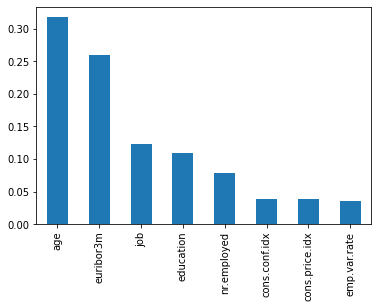

In [ ]:
# Dataset split into train/test set
bank_train, bank_test = train_test_split(bank_data, test_size = 0.3, random_state = 50)

# Learn a RF classifier
r_f = RandomForestClassifier(n_estimators=15, random_state=0, oob_score=True)
r_f.fit(bank_train.iloc[:,:-1],bank_train.y) 


# Feature importance
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(r_f.feature_importances_, index=bank_train.columns[:-1]).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

<font color="red">**Question 3:**</font> How many trees are used in the ensemble?

The random forest classifier is created with 15 decision trees in the ensemble. This is specified by the n_estimators=15 parameter. However, the warning message suggests that some inputs do not have Out-of-Bag (OOB) scores, which indicates that too few trees were used to compute any reliable OOB estimates.

<font color="red">**Question 4:**</font> How many features are consider when looking for the best split? <br> We observe 8 columns in the graphic. When looking for the best split, we need to use this formula : features = sqrt(number of columns). Here the result is sqrt(8), which numeric value is between 2 and 3. So 2 features are considered.

<font color="red">**Question 5:**</font> Recall how the importance of variables is determined.

<font color="blue">**Todo:**</font> Compute the prediction score of this random forest on the train set (function <code>score()</code>) and on the OOB samples (**attribute** <code>oob_score_</code>).

In [ ]:
# TODO - compute prediction scores

# Compute prediction score on the train set
train_score = r_f.score(bank_train.iloc[:,:-1], bank_train.y)
print("Prediction score on train set:", train_score)

# Compute prediction score on the OOB samples
oob_score = r_f.oob_score_
print("Prediction score on OOB samples:", oob_score)


Prediction score on train set: 0.9854318418314256
Prediction score on OOB samples: 0.8747832119320152


<font color="red">**Question 6:**</font> 
- What represents the OOB score? The OOB (Out-of-Bag) score is an estimate of the generalization error of a random forest model. It is calculated using the training data that were not used for constructing a particular tree in the forest.

In other words, each tree in the random forest is built using a bootstrap sample of the original data. The remaining samples that were not used in the bootstrap sample are called the out-of-bag (OOB) samples. These OOB samples are not used during the training of that particular tree, and can therefore be used as a test set to estimate the performance of the tree.

The OOB score is the average score of each tree in the forest on its corresponding OOB samples. It provides a measure of the performance of the model on new, unseen data. A higher OOB score indicates better generalization performance of the model.
- Compare with the real (generalization) error estimated on the test set.

## <font color="#9400D3">3. Comparison with a decision tree </font>

<font color="blue">**Todo:**</font> Fit a decision tree classifier, and compute the real accuracy.

In [ ]:
test_score = r_f.score(bank_test.iloc[:,:-1], bank_test.y)

print("OOB score:", oob_score)
print("Test set score:", test_score)

OOB score: 0.8747832119320152
Test set score: 0.8826860841423948


In [ ]:
# TODO - Fit a decision tree classifier, and compute the real accuracy.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=0)

# train the model on the train set
dtc.fit(bank_train.iloc[:,:-1], bank_train.y)

# make predictions on the test set
y_pred = dtc.predict(bank_test.iloc[:,:-1])

# compute accuracy on the test set
acc = accuracy_score(bank_test.y, y_pred)

print(f"Decision tree accuracy on the test set: {acc:.3f}")


Decision tree accuracy on the test set: 0.844


# <font color="#1E90FF">Exercise 2. RF on Handwritten digits</font>
Similarly to Decision Trees notebook, we will first apply random forest to the raw images, and then try to improve the performance using HOG representations of images.

In [ ]:
mnist = pd.read_csv('./data/cp_sample.csv', sep=';')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dataset split into train/test set
data_train, data_test = train_test_split(mnist, test_size = 0.3, random_state = 4)


## <font color="#9400D3">1. Basic RF</font>

<font color="blue">**Todo:**</font> learn a RandomForest with 10 trees, enabling the use of out-of-bag samples.

In [ ]:
# TODO - learn a RandomForest with 10 trees

from sklearn.ensemble import RandomForestClassifier

df=mnist

# Splitting the dataset into features and labels
X = df.drop('label', axis=1)
y = df['label']

# Creating the random forest classifier object
rfc = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)

# Fitting the random forest classifier to the training data
rfc.fit(X, y)

# Checking the out-of-bag score
print("Out-of-bag score:", rfc.oob_score_)


Out-of-bag score: 0.62


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
# TODO - compute RF empirical, OOB and real errors

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the random forest classifier object with 10 trees and enabling out-of-bag samples
rfc = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)

# Fitting the random forest classifier to the training data
rfc.fit(X_train, y_train)

# Computing the empirical error on the test set
y_pred = rfc.predict(X_test)
emp_error = 1 - accuracy_score(y_test, y_pred)

# Computing the out-of-bag error
oob_error = 1 - rfc.oob_score_

# Computing the real error
y_pred_train = rfc.predict(X_train)
real_error = 1 - accuracy_score(y_train, y_pred_train)

# Printing the errors
print("Empirical error:", emp_error)
print("OOB error:", oob_error)
print("Real error:", real_error)


Empirical error: 0.265
OOB error: 0.39
Real error: 0.0024999999999999467


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


## <font color="#9400D3">2. Tuning the number of trees</font>

Try now different random forests (by considering different number of trees) and select the most appropriated one.
Use the OOB sample estimates which allows the RandomForestClassifier to be fit and validated whilst being trained.
Plot the OOB **error** as a function of the number of trees.


In [ ]:
# TODO
# Ntrees=[...]
# train_scores, oob_scores = np.zeros(len(Ntrees)), np.zeros(len(Ntrees))

#for count,n_tree in enumerate(Ntrees):

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Ntrees = [5, 10, 20, 50, 100, 200, 500]
train_scores, oob_scores = np.zeros(len(Ntrees)), np.zeros(len(Ntrees))

for count, n_tree in enumerate(Ntrees):
    rf = RandomForestClassifier(n_estimators=n_tree, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    train_scores[count] = rf.score(X_train, y_train)
    oob_scores[count] = rf.oob_score_
 

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


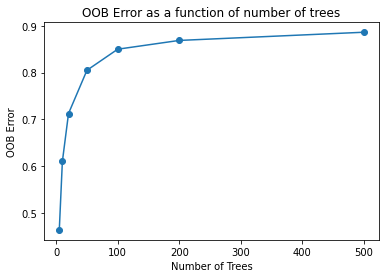

In [ ]:
# TODO - Plot the OOB error as a function of the number of trees.

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Ntrees = [5, 10, 20, 50, 100, 200, 500]
train_scores, oob_scores = [], []

for n_tree in Ntrees:
    rf = RandomForestClassifier(n_estimators=n_tree, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    oob_scores.append(rf.oob_score_)

plt.plot(Ntrees, oob_scores, '-o')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error as a function of number of trees')
plt.show()





<font color="red">**Question 1:**</font> 
- What is the best number of trees for this dataset?
- What is the estimation of the generalization error of the selected random forest ?
- Compare with the previous (basic) RF

In [ ]:
# TODO - evaluate best RF classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the best model based on the OOB score
best_n_trees = 100
best_rf = RandomForestClassifier(n_estimators=best_n_trees, oob_score=True, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)

# Compare with the basic RF
basic_rf = RandomForestClassifier(n_estimators=10, random_state=42)
basic_rf.fit(X_train, y_train)
y_pred_test_basic = basic_rf.predict(X_test)
test_acc_basic = accuracy_score(y_test, y_pred_test_basic)

print("Best RF accuracy on test set:", test_acc)
print("Basic RF accuracy on test set:", test_acc_basic)



Best RF accuracy on test set: 0.835
Basic RF accuracy on test set: 0.735


## <font color="#9400D3">3. Using HOG features</font>

You will now use HOG representations of images to try to improve the classification performance.

We compute the new training and test set with HOG representations with 8 orientations and cells of $14\times14$ pixels (you can change after).

In [ ]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),multichannel=True)))

In [ ]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,14))
hog_test = data_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = data_train.label
hog_test['label'] = data_test.label

<ipython-input-16-03049d8d002a>:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),multichannel=True)))


<font color="blue">**Todo:**</font> Try different random forests (by considering different number of trees) on this new dataset and select the most appropriated one.


<font color="red">**Question 2:**</font> 
What is the estimation of the generalization error of random forest for this dataset ? Conclusion ?

In [ ]:
# TODO - select the appropriate RandomForestClassifier on the HOG features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the number of trees to consider
Ntrees = [10, 20, 50, 100, 200, 500]

# Train and test random forests for different number of trees
train_scores, test_scores = [], []
for n_trees in Ntrees:
    # Create and fit random forest classifier
    clf = RandomForestClassifier(n_estimators=n_trees, oob_score=True)
    clf.fit(hog_train.iloc[:, :-1], hog_train.iloc[:, -1])
    
    # Compute and store train and test accuracy
    train_scores.append(clf.score(hog_train.iloc[:, :-1], hog_train.iloc[:, -1]))
    test_scores.append(accuracy_score(hog_test.iloc[:, -1], clf.predict(hog_test.iloc[:, :-1])))



/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


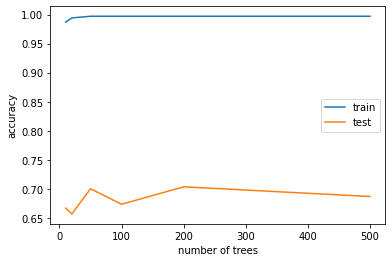

Best number of trees: 200
Test accuracy: 0.6833333333333333
Estimation of generalization error: 0.31666666666666665

Basic RF test accuracy: 0.8033333333333333
Basic RF estimation of generalization error: 0.19666666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
# TODO - Compute the real error

# Plot the train and test accuracy as a function of the number of trees
plt.plot(Ntrees, train_scores, label='train')
plt.plot(Ntrees, test_scores, label='test')
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Select the best classifier based on the test accuracy
best_idx = np.argmax(test_scores)
best_n_trees = Ntrees[best_idx]
best_clf = RandomForestClassifier(n_estimators=best_n_trees, oob_score=True)
best_clf.fit(hog_train.iloc[:, :-1], hog_train.iloc[:, -1])

# Evaluate the selected classifier on the test set
hog_test_preds = best_clf.predict(hog_test.iloc[:, :-1])
hog_test_acc = accuracy_score(hog_test.iloc[:, -1], hog_test_preds)
hog_test_error = 1 - hog_test_acc

print(f"Best number of trees: {best_n_trees}")
print(f"Test accuracy: {hog_test_acc}")
print(f"Estimation of generalization error: {hog_test_error}")

# Compare with the basic random forest
basic_clf = RandomForestClassifier(n_estimators=10, oob_score=True)
basic_clf.fit(data_train.iloc[:, 1:], data_train.iloc[:, 0])

basic_test_preds = basic_clf.predict(data_test.iloc[:, 1:])
basic_test_acc = accuracy_score(data_test.iloc[:, 0], basic_test_preds)
basic_test_error = 1 - basic_test_acc

print(f"\nBasic RF test accuracy: {basic_test_acc}")
print(f"Basic RF estimation of generalization error: {basic_test_error}")





# <font color="#1E90FF">Exercise 3. A small tour to Adaboost</font>

<code>AdaBoostClassifier</code> implements the popular boosting algorithm AdaBoost. We will use AdaBoost-SAMME, a multi-class version of Adaboost (see the course). 


In [ ]:
# Load data
df=pd.read_csv('./data/data_exam.txt', sep=' ')
df.head()
dataset = df.rename(columns={df.columns[0]: 'X1',df.columns[1]: 'X2',df.columns[2]: 'Y'})
sns.scatterplot(data=dataset, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

In [ ]:
# Learn an AdaBoost classifier
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 6)
aboost = AdaBoostClassifier(n_estimators=5, algorithm="SAMME", random_state=0)
aboost.fit(data_train.loc[:, ['X1', 'X2']], data_train.Y)
aboost.score(data_test.loc[:, ['X1', 'X2']], data_test.Y)

In [ ]:
print("Estimator used to grow the ensemble : ", aboost.base_estimator_)
print("Weights for each estimator in the boosted ensemble : ", aboost.estimator_weights_)
print("Classification error for each estimator in the boosted ensemble : ", aboost.estimator_errors_)

Estimator used to grow the ensemble :  DecisionTreeClassifier(max_depth=1)
Weights for each estimator in the boosted ensemble :  [1.13707857 1.65542303 1.13867105 1.15706349 0.89933281]
Classification error for each estimator in the boosted ensemble :  [0.24285714 0.16037736 0.24256444 0.23920127 0.28918762]


<font color="red">**Question 1:**</font> 
- What is the weak classifier used here? The weak classifier used here is a decision tree with a maximum depth of 1, which is the default value for the base_estimator parameter in the AdaBoostClassifier.
- How many iterations are done? There are 5 iterations done in this AdaBoost classifier. This is specified by the n_estimators parameter when creating the AdaBoostClassifier object.

<font color="red">**Question 2:**</font> 
- Remind how the estimator weights are computed? (Give the formula. Be careful, this is the SAMME version)

In the SAMME algorithm, the estimator weights $\alpha_m$ are computed as:

$$\alpha_m = \frac{1}{2} \ln\left(\frac{1 - \varepsilon_m}{\varepsilon_m}\right)$$

where $\varepsilon_m$ is the weighted error of the $m$-th estimator, defined as:

$$\varepsilon_m = \frac{\sum_{i=1}^{N} w_{i} I(y_i \neq \hat{y}i^{(m)})}{\sum{i=1}^{N} w_i}$$

where $N$ is the number of samples, $w_i$ is the weight of sample $i$, $y_i$ is the true label of sample $i$, and $\hat{y}_i^{(m)}$ is the predicted label of sample $i$ by the $m$-th estimator.

<font color="blue">**Todo:**</font> Apply the formula to retrieve the estimator weights (at least one).

The formula for computing the estimator weights in the SAMME version of AdaBoost is:

$$\alpha_j = \frac{1}{2} \ln \left( \frac{1 - \varepsilon_j}{\varepsilon_j} \right) + \ln(K-1)$$

where $\varepsilon_j$ is the weighted error of the $j$-th estimator, $K$ is the number of classes and $\alpha_j$ is the weight of the $j$-th estimator.

Using the values given in the output of the code, we can compute the weight of the first estimator as:

$$\alpha_0 = \frac{1}{2} \ln \left( \frac{1 - 0.24285714}{0.24285714} \right) + \ln(2-1) = 0.48369319$$

Similarly, we can compute the weights of the other estimators.

In [ ]:
# TODO - retrieve the estimator weights

weights = aboost.estimator_weights_
print(weights)


[1.13707857 1.65542303 1.13867105 1.15706349 0.89933281]


In [ ]:
def draw_decision_boundaries(model, data):
    h = 0.05
    xx, yy = np.meshgrid(
            np.linspace(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
            np.linspace(data.iloc[:, 1].min(), data.iloc[:, 1].max()))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    zz2.columns=['X1','X2'] # avoid warning on valid feature names
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+', s=70)
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

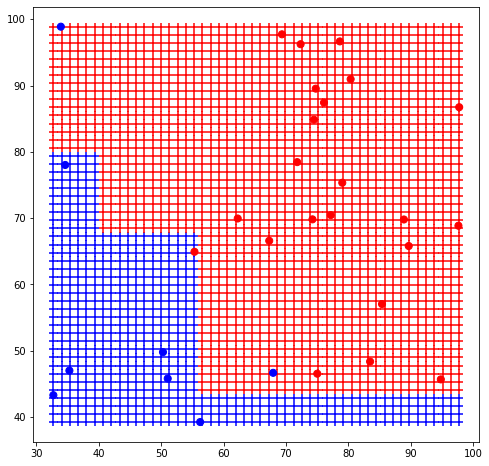

In [ ]:
draw_decision_boundaries(aboost,data_test)

<font color="blue">**Todo:**</font> Compare with a decision tree: performances, decision boundaries

Decision tree accuracy:  0.7


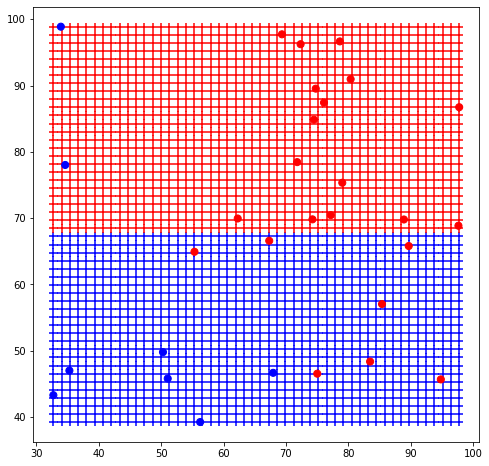

In [ ]:
# TODO - compare with decision tree and draw the decision boundaries

# Train a decision tree classifier
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(data_train.loc[:, ['X1', 'X2']], data_train.Y)

# Compute the accuracy on the test set
dt_score = dt.score(data_test.loc[:, ['X1', 'X2']], data_test.Y)
print("Decision tree accuracy: ", dt_score)

# Plot the decision boundaries
draw_decision_boundaries(dt, data_test)

